In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import math
import cv2

#Adding two images together by using Basic Boolean Operations


In [ ]:
imageTom = Image.open('tom.png')
imageJerry = Image.open('jerry.png')
back = Image.open('background.png')

numpyTom = np.asarray(imageTom)
numpyJerry = np.asarray(imageJerry)
numpyBack = np.asarray(back)

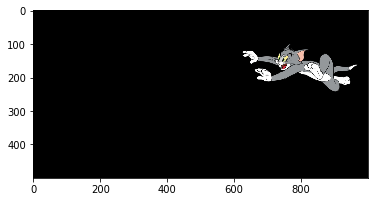

In [ ]:
plt.imshow(numpyTom, interpolation='nearest')
plt.show()

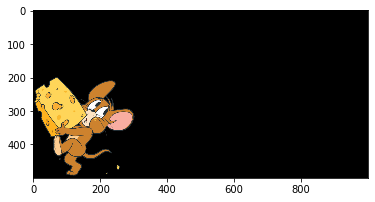

In [ ]:
plt.imshow(numpyJerry, interpolation='nearest')
plt.show()

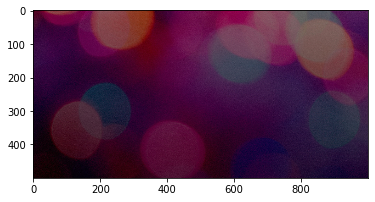

In [ ]:
plt.imshow(numpyBack, interpolation='nearest')
plt.show()

Resizing function if resizing needed.

In [ ]:
def resize(Obj,height,width,dimen):
  xnObj = [] 
  for i in range(height):
    xnObj2 = [] 
    for j in range(width):
      if dimen != 1:
        xnObj2.append(np.array(Obj[i][j][:dimen]))
      else:
        xnObj2.append(Obj[i][j][0])
    xnObj.append(np.array(list(xnObj2)))

  xnObj = np.array(xnObj)
  return xnObj
  

In [ ]:
numpyJerry = resize(numpyJerry,len(numpyJerry),len(numpyJerry[0]),3)
numpyTom = resize(numpyTom,len(numpyTom),len(numpyTom[0]),3)
numpyBack = resize(numpyBack,len(numpyBack),len(numpyBack[0]),3)

Function for addition of Images

In [ ]:
def Add(Obj,Obj2):
  Obj1 = Obj.copy()
  if len(Obj1) == len(Obj2) and len(Obj1[0]) == len(Obj2[0]) and len(Obj1[0][0]) == len(Obj2[0][0]):
    for i in range(len(Obj1)):  
      for j in range(len(Obj1[0])):
        Obj1[i][j] = np.array([ Obj1[i][j][0]+Obj2[i][j][0] ,Obj1[i][j][1]+Obj2[i][j][1] ,Obj1[i][j][2]+Obj2[i][j][2] ])
    return Obj1
  else:
    raise("Image Dimensions are not equal.")

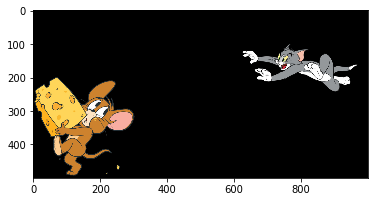

In [ ]:
tom_Jerry = Add(numpyTom,numpyJerry)
Object = tom_Jerry.copy()
plt.imshow(tom_Jerry, interpolation='nearest')
plt.show()

In [ ]:
def convertBinary(Obj):
  for i in range(len(Obj)):
    for j in range(len(Obj[0])):
      if Obj[i][j].tolist() == [0,0,0]:
        Obj[i][j] = np.array([1,1,1])
      else:
        Obj[i][j] = np.array([0,0,0])
  return Obj
      
  

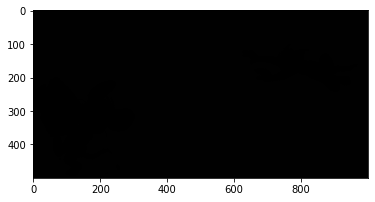

In [ ]:
xObj = convertBinary(tom_Jerry)

plt.imshow(xObj, interpolation='nearest')
plt.show()

In [ ]:
def dotPdt(Obj,Obj2):
  Obj1 = Obj.copy()
  if len(Obj1) == len(Obj2) and len(Obj1[0]) == len(Obj2[0]) and len(Obj1[0][0]) == len(Obj2[0][0]):
    for i in range(len(Obj1)):  
      for j in range(len(Obj1[0])):
        Obj1[i][j] = np.array([ Obj1[i][j][0]*Obj2[i][j][0] ,Obj1[i][j][1]*Obj2[i][j][1] ,Obj1[i][j][2]*Obj2[i][j][2] ])
    return Obj1
  else:
    raise("Image Dimensions are not equal.")
        

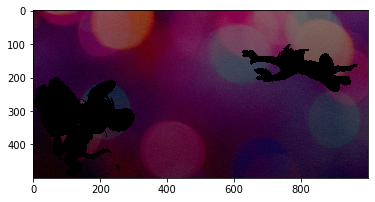

In [ ]:
ImageScene = dotPdt(xObj,numpyBack)

plt.imshow(ImageScene, interpolation='nearest')
plt.show()

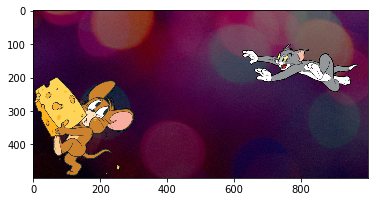

In [ ]:
ImageSceneFinal = Add(ImageScene,Object)

plt.imshow(ImageSceneFinal, interpolation='nearest')
plt.show()